In [1]:
import re

import numpy as np
import matplotlib.pyplot as plt

def filereplace(name):
    file = open(name, 'r')
    data = file.read()
    data = re.sub(r"\n\s+", "\n", data)
    data = re.sub(r" +", ";", data)
    file.close()
    file = open(name, 'w')
    file.write(data)
    file.close()

In [2]:

filereplace('data/xycohph.txt')
filereplace('data/xzcohph.txt')
filereplace('data/yzcohph.txt')

In [3]:
xy = np.loadtxt('data/xycohph.txt',dtype=float, delimiter=';', skiprows=1, unpack=True)
xy[0]=2*np.pi*xy[0]
xz = np.loadtxt('data/xzcohph.txt',dtype=float, delimiter=';', skiprows=1, unpack=True)
xz[0]=2*np.pi*xz[0]
yz = np.loadtxt('data/yzcohph.txt',dtype=float, delimiter=';', skiprows=1, unpack=True)
yz[0]=2*np.pi*yz[0]

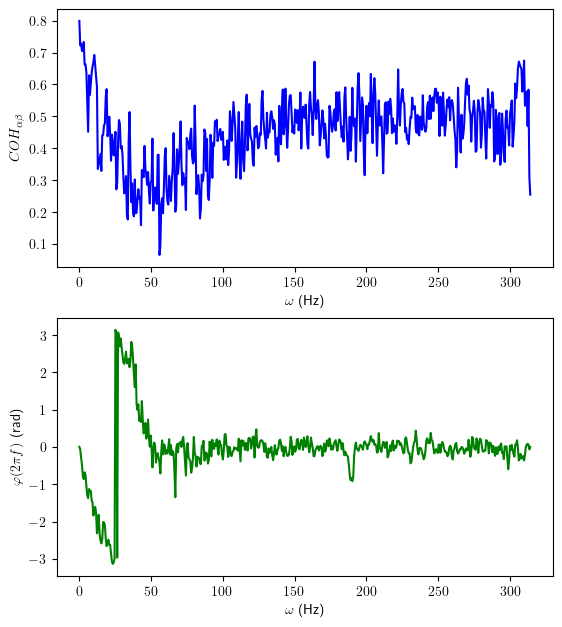

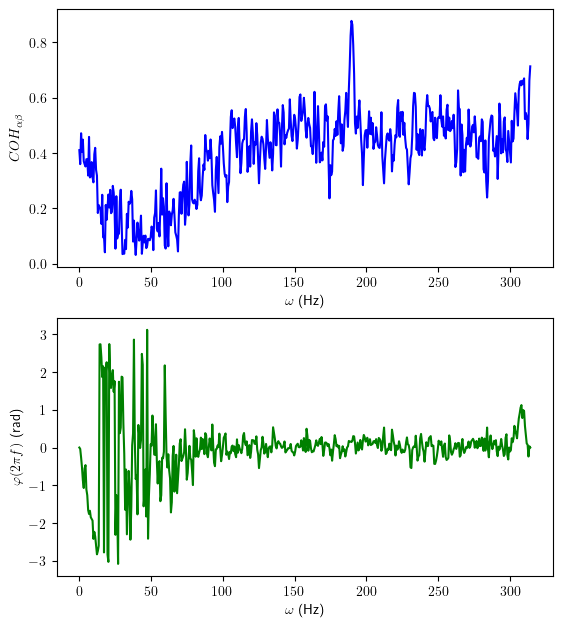

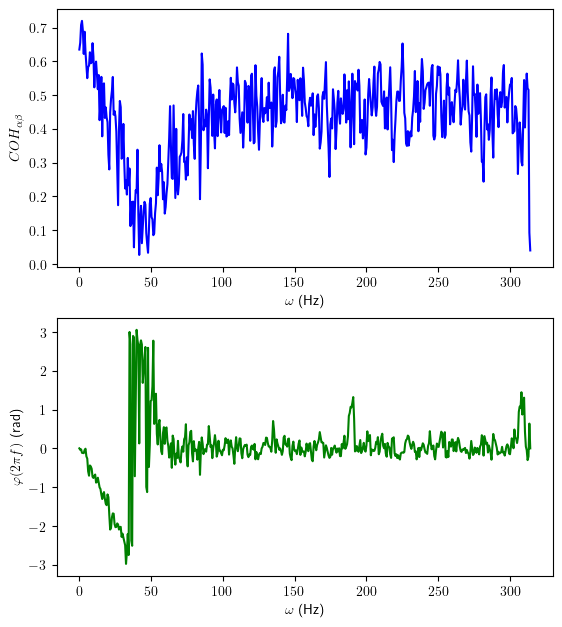

In [4]:

def evalu(asd):
    #xyfit = np.poly1d(np.polyfit(xy[:,0], xy[:,2], 1))

    plt.rcParams['text.usetex']=True
    fig, ax = plt.subplots(2)
    ax[0].plot(asd[0], asd[1], 'b-')
    ax[0].set(xlabel=r'$\omega$ (Hz)', ylabel=r'$COH_{\alpha\beta}$')

    ax[1].plot(asd[0], asd[2], 'g-')
    ax[1].set(xlabel=r'$\omega$ (Hz)', ylabel=r'$\varphi(2\pi f)$ (rad)')

    fig.subplots_adjust(bottom=-0.3)
    plt.show()
    return fig, ax

xyfig = evalu(xy)[0]
xyfig.savefig('xykohph.pdf', format='pdf', dpi=1000, bbox_inches='tight')
xzfig = evalu(xz)[0]
xzfig.savefig('xzkohph.pdf', format='pdf', dpi=1000, bbox_inches='tight')
yzfig = evalu(yz)[0]
yzfig.savefig('yzkohph.pdf', format='pdf', dpi=1000, bbox_inches='tight')




 
-0.1127 x - 0.3738


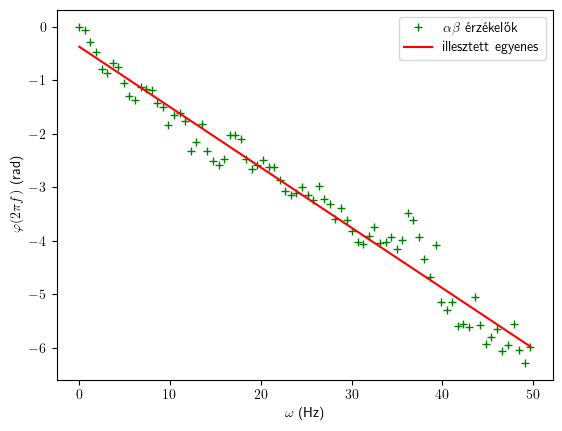

In [16]:
max = 8.0*2*np.pi
xydata = xy[2][xy[0]< max]
om = xy[0][xy[0]< max]
xydata = np.where(xydata<=0, xydata, xydata-2*np.pi)
xyfit = np.poly1d(np.polyfit(om, xydata, 1))
print(xyfit)
plt.plot(om, xydata, 'g+', label=r'$\alpha\beta$ érzékelők')
plt.plot(om, xyfit(om), 'r-', label='illesztett egyenes')
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel(r'$\varphi(2\pi f)$ (rad)')
plt.legend()
plt.savefig('xyfit.pdf', format='pdf', dpi=1000, bbox_inches='tight')

 
-0.2236 x - 0.02651


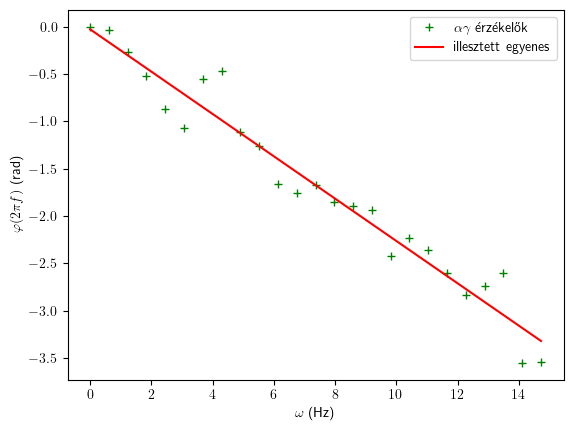

In [25]:
max = 2.4*2*np.pi
xzdata = xz[2][xz[0] < max]
om = xz[0][xz[0] < max]
xzdata = np.where(xzdata <= 0, xzdata, xzdata - 2 * np.pi)
xzfit = np.poly1d(np.polyfit(om, xzdata, 1))
print(xzfit)
plt.plot(om, xzdata, 'g+', label=r'$\alpha\gamma$ érzékelők')
plt.plot(om, xzfit(om), 'r-', label='illesztett egyenes')
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel(r'$\varphi(2\pi f)$ (rad)')
plt.legend()
plt.savefig('xzfit.pdf', format='pdf', dpi=1000, bbox_inches='tight')

 
-0.08279 x + 0.1313


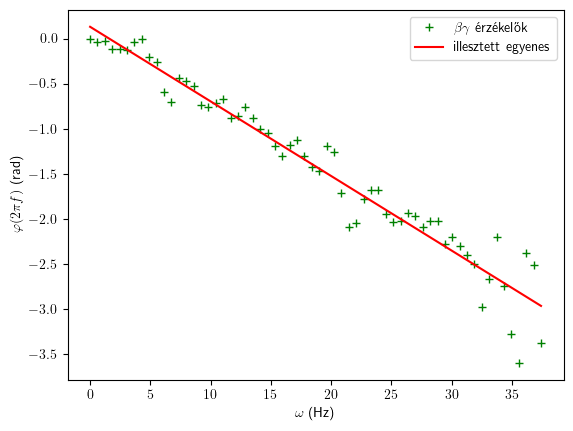

In [29]:
max = 6*2*np.pi
yzdata = yz[2][yz[0] < max]
om = yz[0][yz[0] < max]
yzdata = np.where(yzdata <= 0, yzdata, yzdata - 2 * np.pi)
yzfit = np.poly1d(np.polyfit(om, yzdata, 1))
print(yzfit)
plt.plot(om, yzdata, 'g+', label=r'$\beta\gamma$ érzékelők')
plt.plot(om, yzfit(om), 'r-', label='illesztett egyenes')
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel(r'$\varphi(2\pi f)$ (rad)')
plt.legend()
plt.savefig('yzfit.pdf', format='pdf', dpi=1000, bbox_inches='tight')